In [1]:
import mytry
import matplotlib.pyplot as plt
import os
from utils import evaluate as my_eval
from utils import model_MLP as my_MLP

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

In [2]:
EPOCH = 1000
TARGET_CATEGORY = '제과점'

filepath = "./data/seoul_preprocessed2_y_nextquarter.csv"
savepath = os.path.join('./log', TARGET_CATEGORY)

In [31]:
filepath = "./data/seoul_preprocessed2_y_nextquarter.csv"

# Raw
x_train, y_train, x_test, y_test, scaler_raw = mytry.get_traintest(
    filepath=filepath,
    pred_category=TARGET_CATEGORY, 
    y_next_quarter=True, 
    random_split=True, 
    norm=None, 
    pca=False
)

# MinMMax
scaler_minmax = MinMaxScaler()
x_train_minmax, x_test_minmax = mytry.__get_normed(x_train, x_test, scaler_minmax)
y_train_minmax, y_test_minmax = mytry.__get_normed(y_train, y_test, scaler_minmax)

# Standard
scaler_std = StandardScaler()
x_train_std, x_test_std = mytry.__get_normed(x_train, x_test, scaler_std)
y_train_std, y_test_std = mytry.__get_normed(y_train, y_test, scaler_std)

# PCA
scaler_pca = StandardScaler()
pca = PCA()
x_train_pca, x_test_pca = mytry.__get_normed(x_train, x_test, scaler_pca)
y_train_pca, y_test_pca = mytry.__get_normed(y_train, y_test, scaler_pca)
x_train_pca, x_test_pca = mytry.___get_PCA(x_train_pca, x_test_pca, pca)

[train] 2017_1 : (681, 30), accumulate : (681, 30)
[train] 2017_2 : (681, 30), accumulate : (1362, 30)
[train] 2017_3 : (681, 30), accumulate : (2043, 30)
[train] 2017_4 : (681, 30), accumulate : (2724, 30)
[train] 2018_1 : (681, 30), accumulate : (3405, 30)
[train] 2018_2 : (681, 30), accumulate : (4086, 30)
[train] 2018_3 : (681, 30), accumulate : (4767, 30)
[test] 2019_1 : (681, 30), accumulate : (681, 30)
[test] 2019_2 : (681, 30), accumulate : (1362, 30)
[test] 2019_3 : (681, 30), accumulate : (2043, 30)
[test] 2018_4 : (681, 30), accumulate : (2724, 30)
x_header ['남성연령대_10_유동인_수', '남성연령대_20_유동인_수', '남성연령대_30_유동인_수', '남성연령대_40_유동인_수', '남성연령대_50_유동인_수', '남성연령대_60_유동인_수', '여성연령대_10_유동인_수', '여성연령대_20_유동인_수', '여성연령대_30_유동인_수', '여성연령대_40_유동인_수', '여성연령대_50_유동인_수', '여성연령대_60_유동인_수'] y_header ['다음분기_매출_금액']
random split
pca ratios [0.78 0.1  0.08 0.01 0.01 0.01 0.   0.   0.   0.   0.   0.  ]
pca ratios [0.78 0.1  0.08 0.01 0.01 0.01 0.   0.   0.   0.   0.   0.  ]
pca top-3


In [32]:
dataset_raw =    [x_train, y_train, x_test, y_test]
dataset_minmax = [x_train_minmax, y_train_minmax, x_test_minmax, y_test_minmax]
dataset_std =    [x_train_std, y_train_std, x_test_std, y_test_std]
dataset_pca =    [x_train_pca, y_train_pca, x_test_pca, y_test_pca]

# Model training

## LGBM

In [33]:
model_LGBM_raw = mytry.main(
    modelname='LGBM_raw',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_raw,
    scaler = scaler_raw
)

------- evaluate LGBM with raw -------
RMSE : 395782301.352773
R2 : 0.521823
----------------------------
[1249817.09220109] 2248
평균 오차 556%
최대 오차 83531%
최소 오차 0%


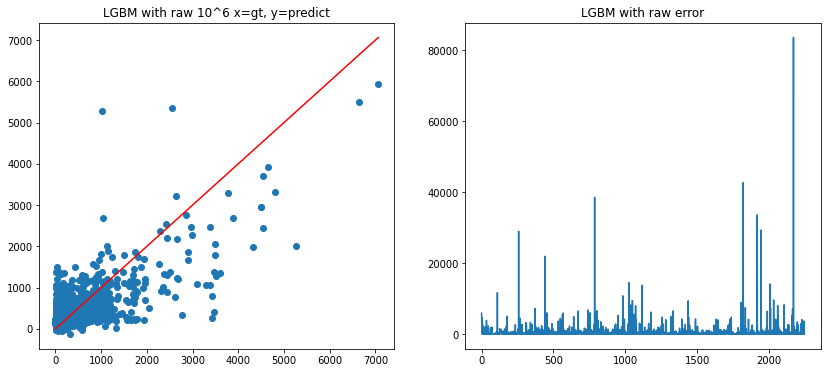

In [34]:
errs_LGBM_raw = my_eval.eval_regression(y_test, model_LGBM_raw.predict(x_test), scaler=scaler_raw, model_name='LGBM with raw', savepath=savepath)

In [35]:
model_LGBM_minmax = mytry.main(
    modelname='LGBM_minmax',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_minmax,
    scaler = scaler_minmax
)

In [36]:
model_LGBM_std = mytry.main(
    modelname='LGBM_std',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_std,
    scaler = scaler_std
)

In [37]:
model_LGBM_pca = mytry.main(
    modelname='LGBM_pca',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_pca,
    scaler = scaler_pca
)

## 4-MLP [12, 6, 1]

In [38]:
model_4MLP_raw, hist_4MLP_raw = mytry.main(
    modelname='4-MLP_raw',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_raw,
    scaler = scaler_raw,
    n_hidden=2,
    epoch=EPOCH
)

...................../log/제과점/4-MLP_raw-epoch:0999-val_mse:268183015002210304.0000.hdf5 saved


In [39]:
model_4MLP_minmax, hist_4MLP_minmax = mytry.main(
    modelname='4-MLP_minmax',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_minmax,
    scaler = scaler_minmax,
    n_hidden=2,
    epoch=EPOCH
)

.
Epoch 00022: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.

Epoch 00032: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.

Epoch 00042: ReduceLROnPlateau reducing learning rate to 1e-06.
..................../log/제과점/4-MLP_minmax-epoch:0999-val_mse:0.0039.hdf5 saved


In [40]:
model_4MLP_std, hist_4MLP_std = mytry.main(
    modelname='4-MLP_std',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_std,
    scaler = scaler_std,
    n_hidden=2,
    epoch=EPOCH
)

..........
Epoch 00498: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
.
Epoch 00517: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.

Epoch 00527: ReduceLROnPlateau reducing learning rate to 1e-06.
../log/제과점/4-MLP_std-epoch:0556-val_mse:0.5368.hdf5 saved


In [41]:
model_4MLP_pca, hist_4MLP_pca = mytry.main(
    modelname='4-MLP_pca',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_pca,
    scaler = scaler_pca,
    n_hidden=2,
    epoch=EPOCH
)

...
Epoch 00125: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
.
Epoch 00151: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.

Epoch 00161: ReduceLROnPlateau reducing learning rate to 1e-06.
................./log/제과점/4-MLP_pca-epoch:0999-val_mse:0.5864.hdf5 saved


## 5-MLP [24, 12, 6, 1]

In [42]:
model_5MLP_raw, hist_5MLP_raw = mytry.main(
    modelname='5-MLP_raw',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_raw,
    scaler = scaler_raw,
    n_hidden=3,
    epoch = EPOCH
)

...................../log/제과점/5-MLP_raw-epoch:0999-val_mse:263020962528624640.0000.hdf5 saved


In [43]:
model_5MLP_minmax, hist_5MLP_minmax = mytry.main(
    modelname='5-MLP_minmax',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_minmax,
    scaler = scaler_minmax,
    n_hidden=3,
    epoch = EPOCH
)

.
Epoch 00041: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
.
Epoch 00051: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.

Epoch 00061: ReduceLROnPlateau reducing learning rate to 1e-06.
.................../log/제과점/5-MLP_minmax-epoch:0999-val_mse:0.0039.hdf5 saved


In [44]:
model_5MLP_std, hist_5MLP_std = mytry.main(
    modelname='5-MLP_std',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_std,
    scaler = scaler_std,
    n_hidden=3,
    epoch = EPOCH
)

.....
Epoch 00244: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
....
Epoch 00416: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.

Epoch 00426: ReduceLROnPlateau reducing learning rate to 1e-06.
../log/제과점/5-MLP_std-epoch:0455-val_mse:0.4933.hdf5 saved


In [45]:
model_5MLP_pca, hist_5MLP_pca = mytry.main(
    modelname='5-MLP_pca',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_pca,
    scaler = scaler_pca,
    n_hidden=3,
    epoch = EPOCH
)

..
Epoch 00068: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.

Epoch 00091: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.
.
Epoch 00101: ReduceLROnPlateau reducing learning rate to 1e-06.
................../log/제과점/5-MLP_pca-epoch:0999-val_mse:0.5793.hdf5 saved


# Evaluate

## LGBM

------- evaluate LGBM with raw -------
RMSE : 395782301.352773
R2 : 0.521823
----------------------------
[1249817.09220109] 2248
평균 오차 556%
최대 오차 83531%
최소 오차 0%


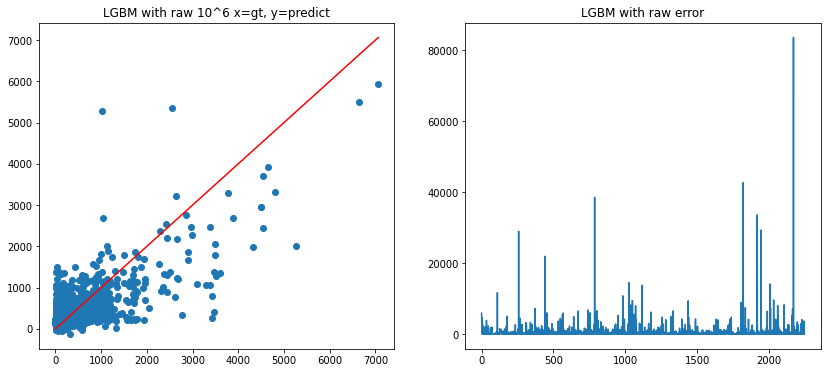

In [46]:
errs_LGBM_raw = my_eval.eval_regression(y_test, model_LGBM_raw.predict(x_test), scaler=scaler_raw, 
                                        model_name='LGBM with raw', savepath=savepath)

------- evaluate LGBM with minmax norm -------
RMSE : 393127137.793429
R2 : 0.528218
----------------------------
[1275652.37761982] 2248
평균 오차 567%
최대 오차 129826%
최소 오차 0%


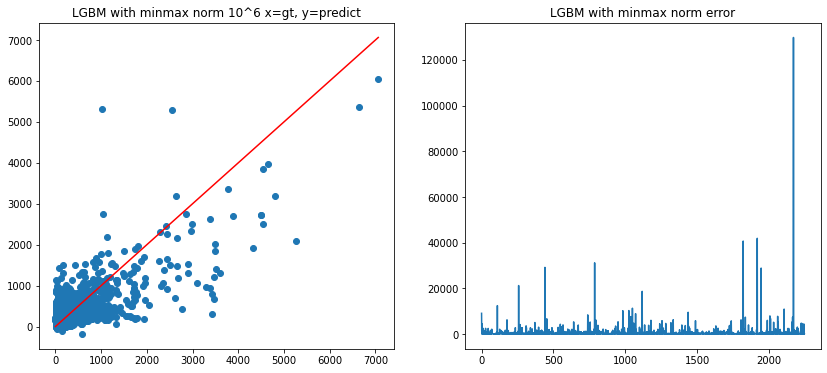

In [47]:
errs_LGBM_minmax = my_eval.eval_regression(y_test_minmax, model_LGBM_minmax.predict(x_test_minmax), scaler=scaler_minmax, 
                                           model_name='LGBM with minmax norm', savepath=savepath)

------- evaluate LGBM with std norm -------
RMSE : 399850813.405363
R2 : 0.511942
----------------------------
[1228622.423831] 2248
평균 오차 547%
최대 오차 105088%
최소 오차 0%


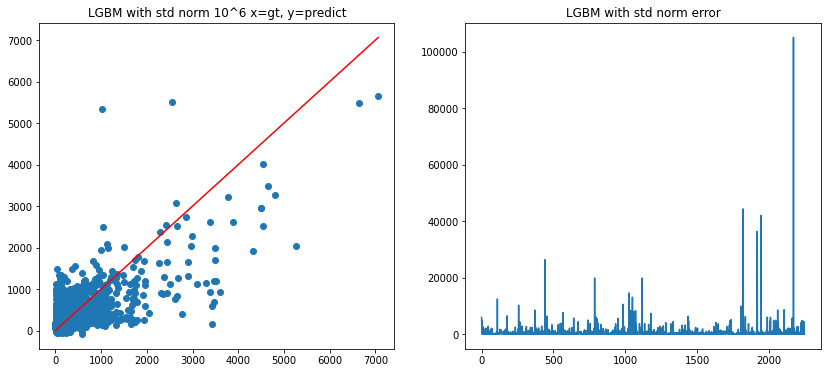

In [48]:
errs_LGBM_std = my_eval.eval_regression(y_test_std, model_LGBM_std.predict(x_test_std), scaler=scaler_std, 
                                        model_name='LGBM with std norm', savepath=savepath)

------- evaluate LGBM with PCA -------
RMSE : 473554765.555016
R2 : 0.315433
----------------------------
[1404403.42948602] 2248
평균 오차 625%
최대 오차 121429%
최소 오차 0%


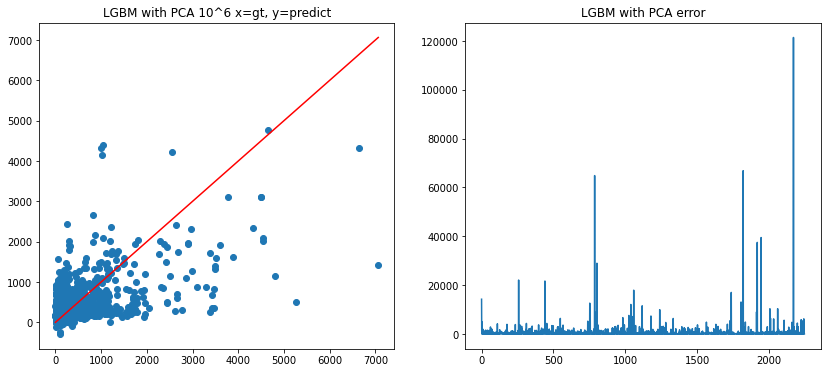

In [49]:
errs_LGBM_pca = my_eval.eval_regression(y_test_pca, model_LGBM_pca.predict(x_test_pca), scaler=scaler_pca, 
                                        model_name='LGBM with PCA', savepath=savepath)

## 4-MLP

------- evaluate 4-MLP with raw -------
RMSE : 517863942.343147
R2 : 0.181334
----------------------------
[1224105.63830919] 2248
평균 오차 545%
최대 오차 254062%
최소 오차 0%


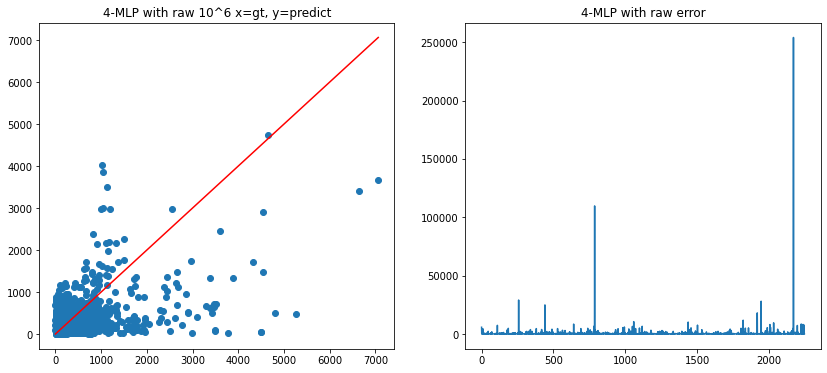

In [50]:
errs_4MLP_raw = my_eval.eval_regression(y_test, model_4MLP_raw.predict(x_test), scaler=scaler_raw, 
                                        model_name='4-MLP with raw', savepath=savepath)

------- evaluate 4-MLP with minmax norm -------
RMSE : 494087021.742906
R2 : 0.254784
----------------------------
[1494728.34261721] 2248
평균 오차 665%
최대 오차 179031%
최소 오차 0%


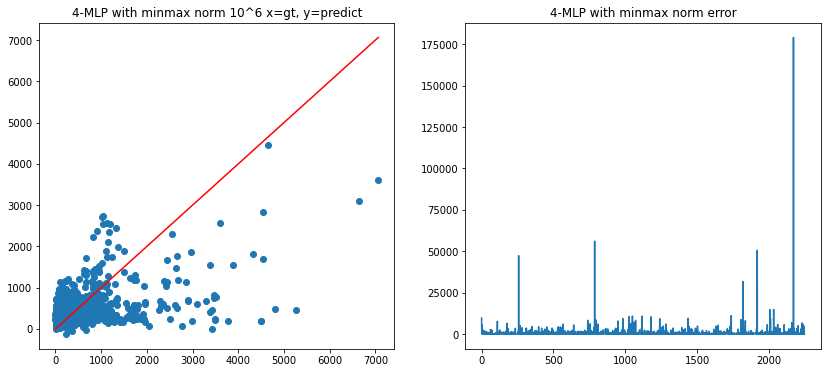

In [51]:
errs_4MLP_minmax = my_eval.eval_regression(y_test_minmax, model_4MLP_minmax.predict(x_test_minmax), scaler=scaler_minmax, 
                                           model_name='4-MLP with minmax norm', savepath=savepath)

------- evaluate 4-MLP with std -------
RMSE : 473161958.060682
R2 : 0.316568
----------------------------
[1382270.67268736] 2248
평균 오차 615%
최대 오차 153981%
최소 오차 0%


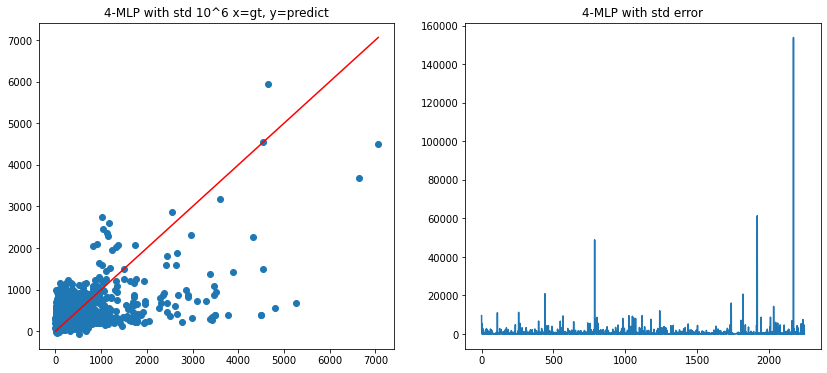

In [52]:
errs_4MLP_std = my_eval.eval_regression(y_test_std, model_4MLP_std.predict(x_test_std), scaler=scaler_std, 
                                        model_name='4-MLP with std', savepath=savepath)

------- evaluate 4-MLP with PCA -------
RMSE : 494541907.318427
R2 : 0.253411
----------------------------
[1542815.13844867] 2248
평균 오차 686%
최대 오차 203328%
최소 오차 0%


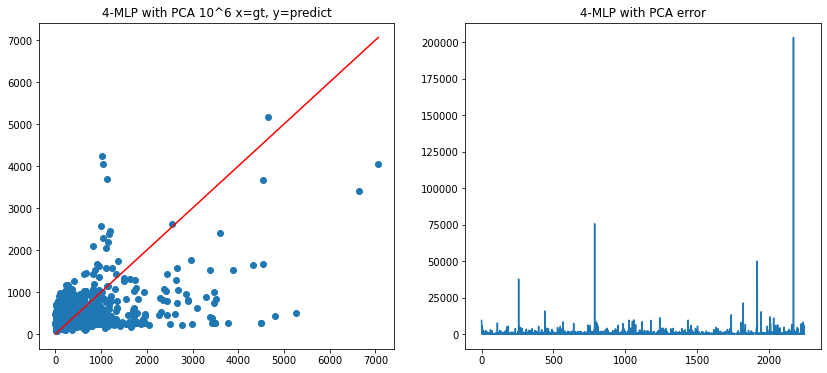

In [53]:
errs_4MLP_pca = my_eval.eval_regression(y_test_pca, model_4MLP_pca.predict(x_test_pca), scaler=scaler_pca, 
                                        model_name='4-MLP with PCA', savepath=savepath)

# 5-MLP

------- evaluate 5-MLP with raw -------
RMSE : 512855706.625427
R2 : 0.197092
----------------------------
[1110451.08337217] 2248
평균 오차 494%
최대 오차 227039%
최소 오차 0%


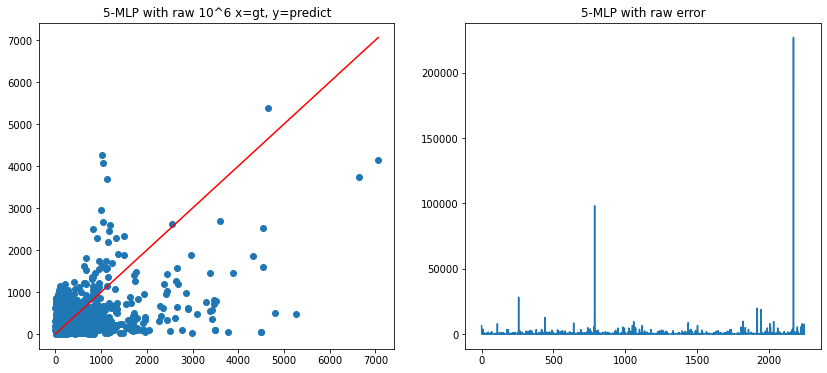

In [54]:
errs_5MLP_raw = my_eval.eval_regression(y_test, model_5MLP_raw.predict(x_test), scaler=scaler_raw, 
                                        model_name='5-MLP with raw', savepath=savepath)

------- evaluate 5-MLP with minmax norm -------
RMSE : 490667329.287113
R2 : 0.265063
----------------------------
[1610970.43023402] 2248
평균 오차 717%
최대 오차 238641%
최소 오차 0%


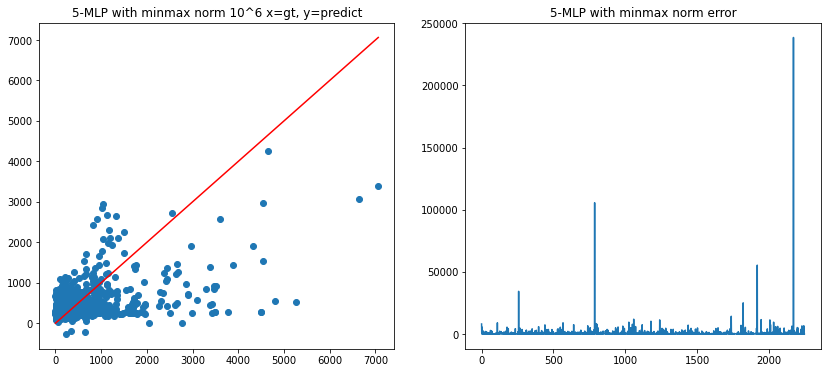

In [55]:
errs_5MLP_minmax = my_eval.eval_regression(y_test_minmax, model_5MLP_minmax.predict(x_test_minmax), scaler=scaler_minmax, 
                                           model_name='5-MLP with minmax norm', savepath=savepath)

------- evaluate 5-MLP with std norm -------
RMSE : 453547224.909208
R2 : 0.372056
----------------------------
[1381578.87889927] 2248
평균 오차 615%
최대 오차 142731%
최소 오차 0%


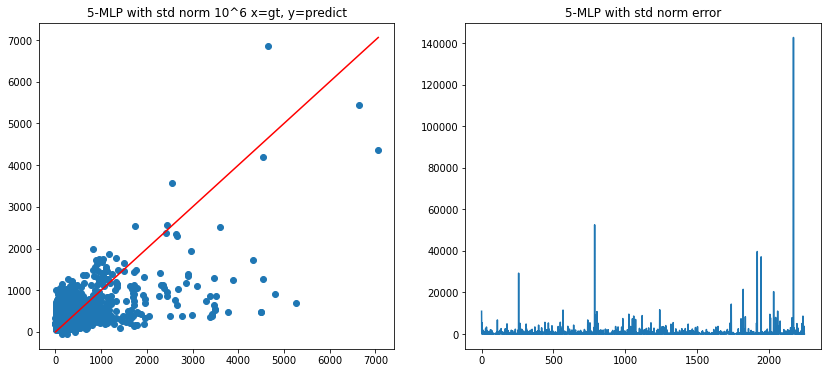

In [56]:
errs_5MLP_std = my_eval.eval_regression(y_test_std, model_5MLP_std.predict(x_test_std), scaler=scaler_std, 
                                        model_name='5-MLP with std norm', savepath=savepath)

------- evaluate 5-MLP with PCA -------
RMSE : 491529011.324621
R2 : 0.262480
----------------------------
[1492780.15627334] 2248
평균 오차 664%
최대 오차 193747%
최소 오차 0%


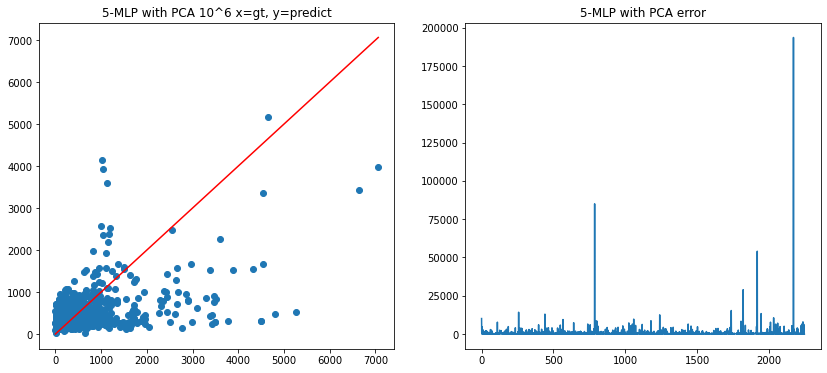

In [57]:
errs_5MLP_pca = my_eval.eval_regression(y_test_pca, model_5MLP_pca.predict(x_test_pca), scaler=scaler_pca, 
                                        model_name='5-MLP with PCA', savepath=savepath)

# Appendix - MLP training history

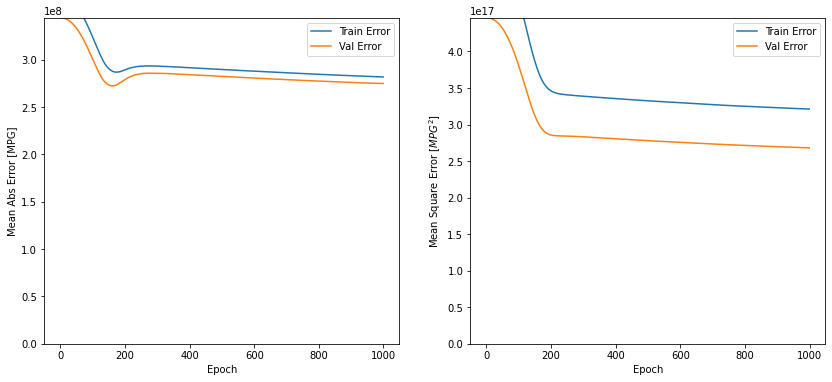

In [58]:
my_MLP.plot_history(hist_4MLP_raw)

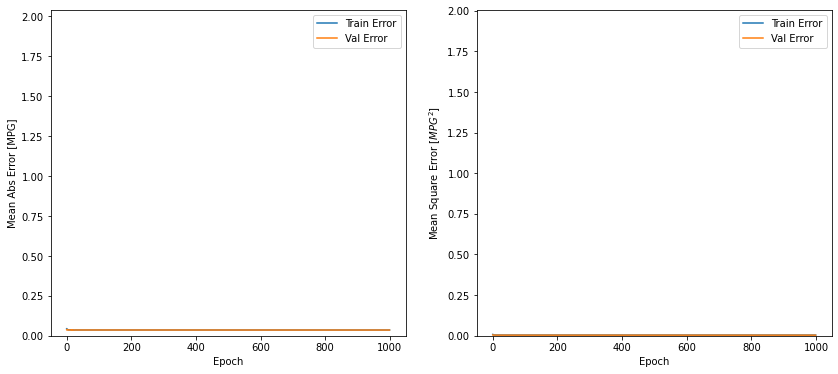

In [59]:
my_MLP.plot_history(hist_4MLP_minmax)

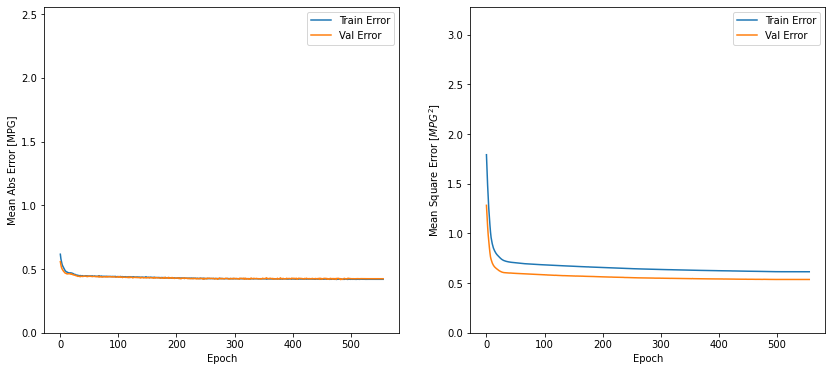

In [60]:
my_MLP.plot_history(hist_4MLP_std)

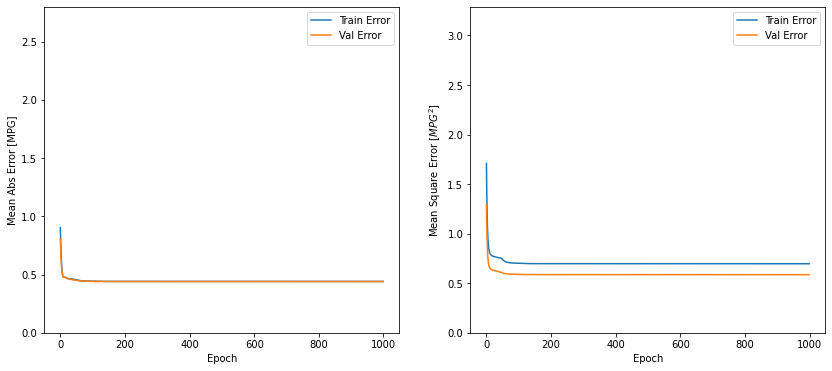

In [61]:
my_MLP.plot_history(hist_4MLP_pca)

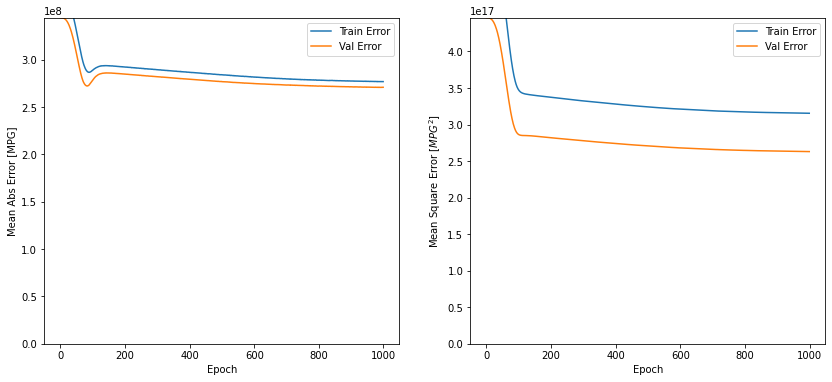

In [62]:
my_MLP.plot_history(hist_5MLP_raw)

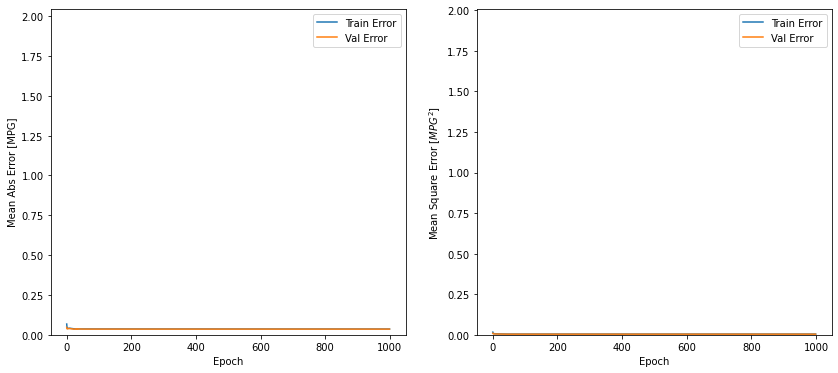

In [63]:
my_MLP.plot_history(hist_5MLP_minmax)

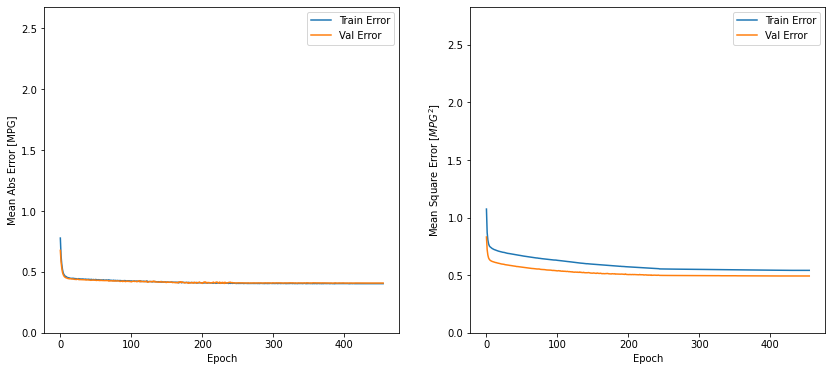

In [64]:
my_MLP.plot_history(hist_5MLP_std)

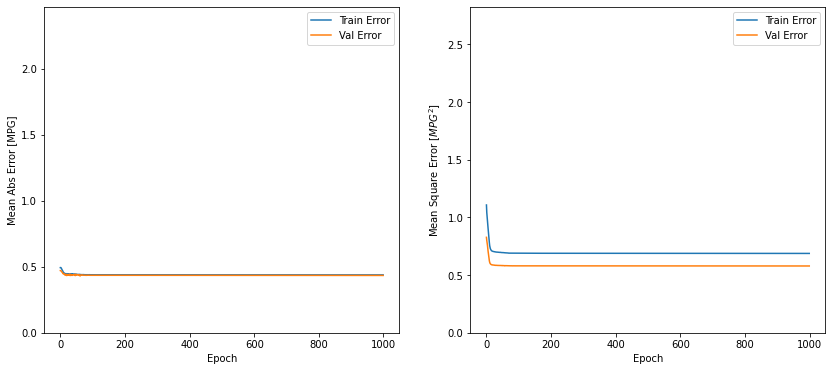

In [65]:
my_MLP.plot_history(hist_5MLP_pca)